In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
# import dataset
data = pd.read_excel(r'C:\Users\hp\Downloads\customer.xlsx')

In [6]:
data['StockCode'].nunique()

4070

In [17]:
data[data.duplicated(keep = 'first')] # filter suplicated values 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


Though detected as duplicates, this might not be the case as the product code and description differs for some entries

In [38]:
data.dtypes # check datatypes 

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
Revenue               float64
Year                    int32
Month                   int32
dtype: object

In [77]:
#check null values
print(data.isnull().sum())

# calculate percentage nulls: count of nulls/len_of_data
columns = []
for cols in list(data.columns):
    null_count = data[cols].isnull().sum()
    per_null = round(float((null_count/len(data[cols])) * 100), 1)
    columns.append(f'{cols} : {per_null}%')

columns

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Revenue             0
Year                0
Month               0
dtype: int64


['InvoiceNo : 0.0%',
 'StockCode : 0.0%',
 'Description : 0.3%',
 'Quantity : 0.0%',
 'InvoiceDate : 0.0%',
 'UnitPrice : 0.0%',
 'CustomerID : 24.9%',
 'Country : 0.0%',
 'Revenue : 0.0%',
 'Year : 0.0%',
 'Month : 0.0%']

No need deleting columns with null values as they don't contain atleast 50% null values 

Analysis 1: Identify anomalies or outliers in the dataset, such as unusually large order, what factor might explain them

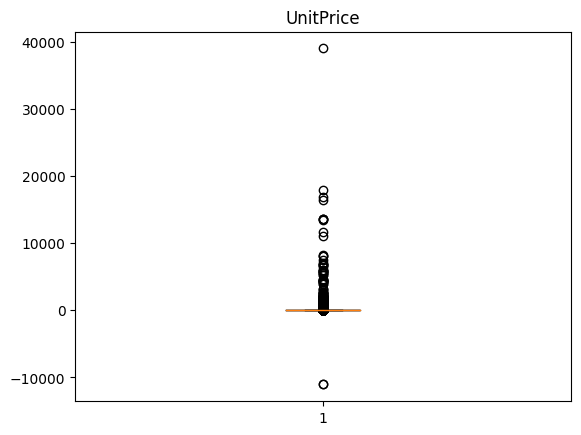

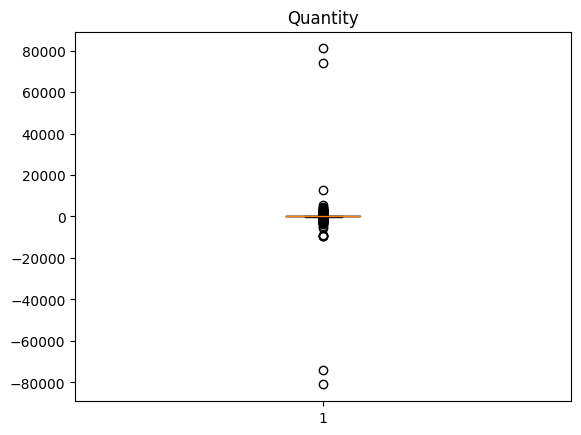

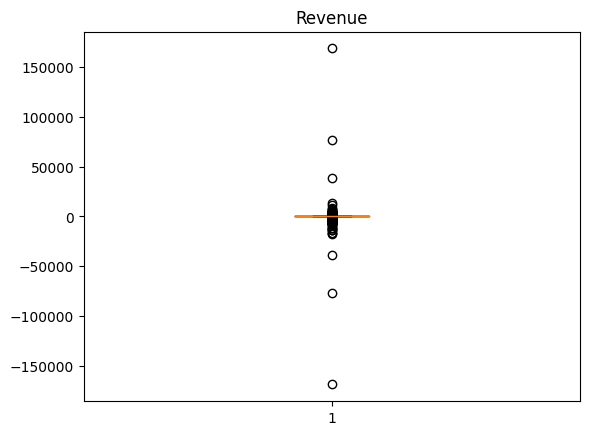

In [44]:
# check column factors that might have resulted to outliers in the revenue column
columns = ['UnitPrice', 'Quantity']
for col in columns:
    plt.boxplot(data[col])
    plt.title(col)
    plt.show()

In [12]:
# Calculating outlier using the n_sigma rule
def outlier(data, column):
    # This function filter outliers for any column 
    outliers = data[(data[column] > (data[column].mean() + (3*data[column].std())))|
                    (data[column]< (data[column].mean() - (3*data[column].std())))]#['Month'].value_counts()
    return outliers

In [82]:
# investigate Quantity column
outlier(data, column = 'Quantity')['Country'].value_counts()

Country
United Kingdom    328
Netherlands         6
Japan               3
Sweden              3
Australia           3
EIRE                2
France              1
Name: count, dtype: int64

In [92]:
# Investigate Unitprice Column
outlier(data, column = 'UnitPrice')['Country'].value_counts()

Country
United Kingdom    312
EIRE               12
Singapore          10
Portugal           10
Germany             9
Hong Kong           6
France              5
Norway              3
Spain               2
Cyprus              2
Australia           1
Canada              1
Italy               1
Name: count, dtype: int64

In [84]:
data['Country'].value_counts()

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


Insight 1: Most of the outliers in the Quantity column is noticed to be coming from United Kingdom, same with the outliers identified in Unit Price. United Kingdom have the majority of the data, so it makes sense that mistakes in data entry is made there mostly

In [5]:
# Eliminate Outliers
def remove_outliers(data, column):
    outliers = (data[column] > (data[column].mean() + (3*data[column].std())))|\
        (data[column]< (data[column].mean() - (3*data[column].std())))
    if outliers.any():  # Check if there are any outliers
        return data.loc[~outliers]
    else:
        return data

In [6]:
data = remove_outliers(data, column = 'Quantity') # remove for Quantity column

In [7]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [8]:
data = remove_outliers(data, column = 'UnitPrice') # remove outlier for unit price

In [9]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [10]:
# generating Month column and year column 
data['Year'] = data['InvoiceDate'].dt.year
data['Month'] = data['InvoiceDate'].dt.month

data['Revenue'] = data['UnitPrice'] * data['Quantity'] # generate revenue column

C:\Users\hp\AppData\Local\Temp\ipykernel_13948\1726850575.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = data['InvoiceDate'].dt.year
C:\Users\hp\AppData\Local\Temp\ipykernel_13948\1726850575.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Month'] = data['InvoiceDate'].dt.month
C:\Users\hp\AppData\Local\Temp\ipykernel_13948\1726850575.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [11]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,20.34
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011,12,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,16.60


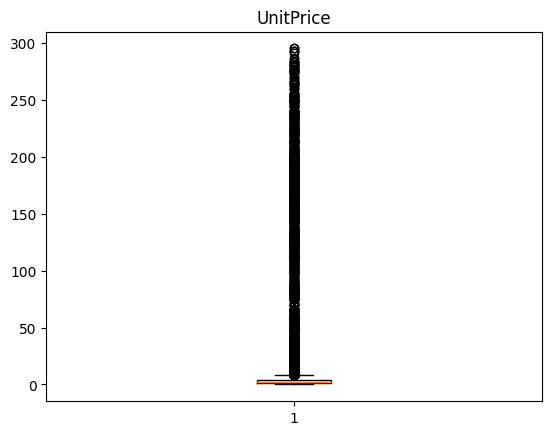

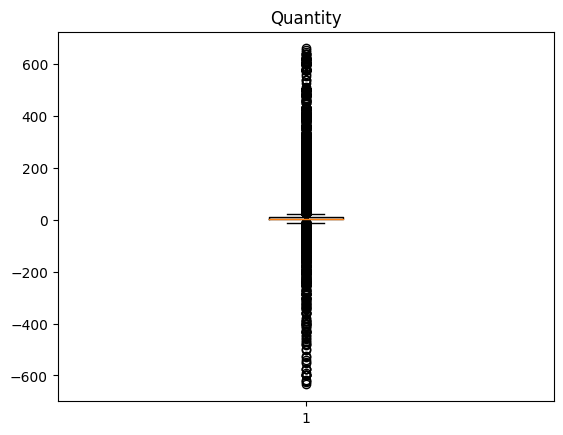

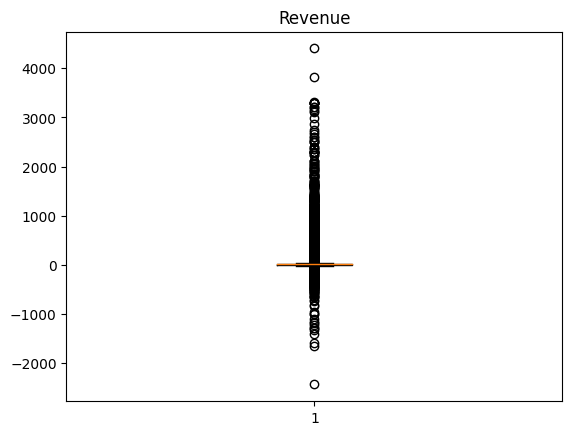

In [17]:
# Verify presence of outliers
columns = ['UnitPrice', 'Quantity', 'Revenue']
for col in columns:
    plt.boxplot(data[col])
    plt.title(col)
    plt.show()

Outliers has been dealt with 

Save data and Load to Power BI for further analysis and visualisation

In [18]:
data.to_csv('Clean Customer Data.csv', index = False)